In [1]:
%pylab inline
import plot_is

Populating the interactive namespace from numpy and matplotlib


this is inside ramses/ 

In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


The END specifies where the program continues if EOF is ecountered, but since we neever go into anything after the read statement it means that it hit the EOF prematurely 

"If the value of IOstatus is negative, it means the end of the input has reached. Under this circumstance, some or all of the variables in the READ may not receive input values."

Testing simpler case 

Actually I didn't fill out the things completely I ignored the angular momentum so maybe that's why its reading the file weirdly because it just guesses a random value (initialization value) for the ones that were note read in 

but still go this : 

so maybe we shouldn't have ,end=102 because it just goes to line 102 when eof which is what is happening now '

In [ ]:
Reading stuff from ic_sink^M
 after reading^M
 Info before end do :   4.625950824304294E-312  6.953355805534635E-310^M
  0.000000000000000E+000  1.976262583364986E-323  8.601884472879606E-317^M
  8.450467186267347E-317  6.299680197058090E-315  1.581010066691989E-322^M
  7.294360546265093E-315  5.636551319751505E-315^M
 Reading stuff from ic_sink^M
 after reading^M
 Info before end do :   4.625950824304294E-312  6.953355805534635E-310^M
  0.000000000000000E+000  1.976262583364986E-323  8.601884472879606E-317^M
  8.450467186267347E-317  6.299680197058090E-315  1.581010066691989E-322^M
  7.294360546265093E-315  5.636551319751505E-315^M
 Reading stuff from ic_sink^M
 after reading^M

Now its reading this correctly, the trick was that the ic_sink must be inside bin/ and not patch/ which is why it couldn't find the file. It was correctly looking for ic_sink but at the wrong location. Which explains the anomalous initialization values '

Okay reading correctly now, we can try running larger ones then 

Okay so since I removed the "end=" parameter it just keep reading until memory crashes (which explains the seg vfault after ~3 minutes) , so now I can put the end= back and it shuld terminate after reading all the sink info (here we only have one sink)

That didn't help, if we look at the test.f90 ecxample that I was doing, we must explicitly state EXIT when we hit EOF, since we are only doing one iteration we could just exit in the end (the do loop is not evern necessary)'

In [ ]:
Reading stuff from ic_sink
 after reading
 IOstat:          31
 after 102
 IOstat:          31
 Info:   0.000000000000000E+000  0.000000000000000E+000  4.940656458412465E-324
  4.835920470281871E-317  3.943921507573293E-317  4.940656458412465E-324
  4.940656458412465E-324  6.953355805657953E-310  9.078592604451157E-317
  2.317856002471416E-310
 Vector info:            1  0.000000000000000E+000   70.0000000000000
   70.0000000000000        70.0000000000000       3.943921507573293E-317
  4.940656458412465E-324  4.940656458412465E-324  6.953355805657953E-310
  9.078592604451157E-317  2.317856002471416E-310  0.000000000000000E+000
 Reading stuff from ic_sink
 after reading
 IOstat:          31

Actually the end= is not good, lets take it out because the exit is manually specified 

Okay now we sucessfully created a sink! 

In [4]:
cat  ~/project/ramses/trunk/ramses/bin/output_00001/sink_00001.info

 Number of sink =            1
        Id       Mass(Msol)             x                y                z               vx               vy               vz      
         1    0.2374971E-05    0.7000000E+02    0.7000000E+02    0.7000000E+02    0.1000000E-07    0.1000000E-07    0.1000000E-07


In [6]:
cat  ~/project/ramses/trunk/ramses/bin/output_00004/sink_00004.info

 Number of sink =            1
        Id       Mass(Msol)             x                y                z               vx               vy               vz      
         1    0.8584957E-03    0.7000000E+02    0.7000000E+02    0.7000000E+02    0.7498332E-11    0.7498344E-11    0.7498723E-11


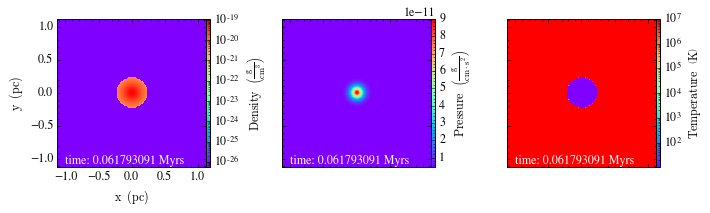

In [5]:
plot_is.check_IC_profiles()

To Do Next: 
- remove print statements
- evolve longer to see what accretion sink does at later timsteps , and whetehr it helps resolve the anomalous RV stuff
- plot mass accretion rate Mdot
- try plotting the sink location and check whether this output is in code units or physical, is the sink being placed at the center of the core? 


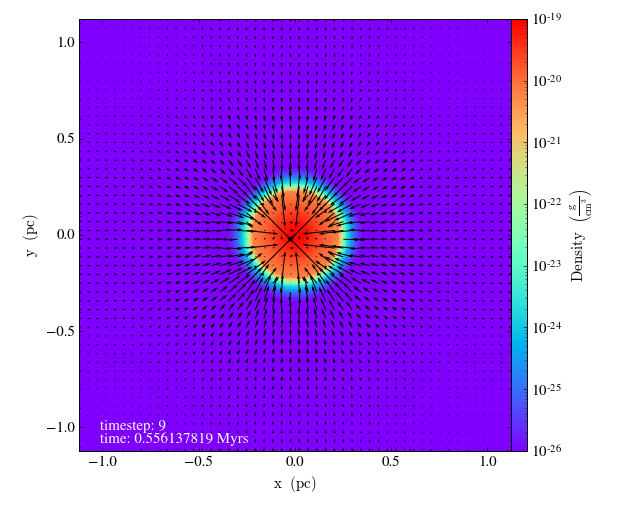

In [8]:
plot_is.plot_time_slice("density",9,plot_size=6,zmin=1e-26,zmax=1e-19)
# plot_is.plot_time_slice("density",2,plot_size=3,zmin=1e-26,zmax=1e-19)



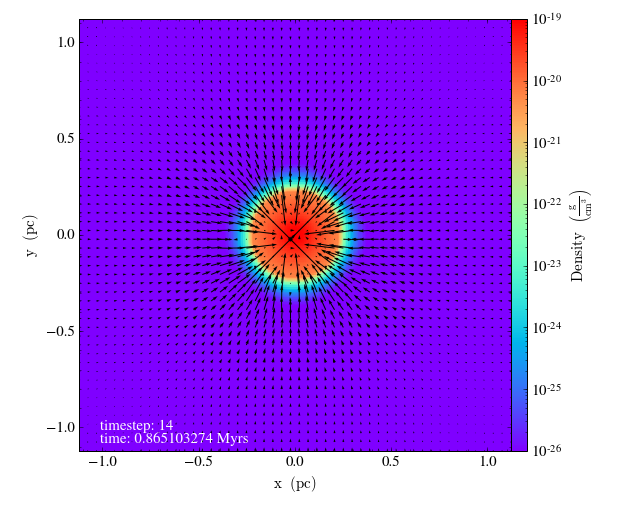

In [14]:
plot_is.plot_time_slice("density",14,plot_size=6,zmin=1e-26,zmax=1e-19)

The timestep becomes very restrictive when using sink particles, it takes 10 hrs on 32 cores to evolve 15 timesteps

In [ ]:
1.E-5 1.E-8 1.E-8 1.E-8 1.E-8 1.E-8 1.E-8 1.E-8 1.E-8 1.E-8

In [ ]:
xsink(nsink,1)=xx1+boxlen/2.0

In [19]:
sink_info

array([  1.00000000e+00,   2.37497100e-06,   7.00000000e+01,
         7.00000000e+01,   7.00000000e+01,   1.00000000e-08,
         1.00000000e-08,   1.00000000e-08])

[ 0.49804688  0.49804688  0.49804688] code_length


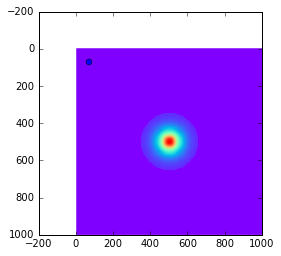

In [31]:
import yt
# id, mass (msol), x, y ,z, vx,vy,vz
sink_info = np.loadtxt("output_00001/sink_00001.info",comments="=",skiprows=4)
timestep=1
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
c = ds.find_max("density")[1]
# print c
#this center kinda off so lets just use this one ...
# c= [0.5,0.5,0.5]
#c = [sink_info[2],sink_info[3],sink_info[4]]
slc = yt.SlicePlot(ds, "z",physical_quantity)
width = (1.5, 'pc') 
res = [1000, 1000] 
frb = slc.data_source.to_frb(width, res)#, center=c) 
plt.figure()
plt.imshow(np.array(frb["density"]),cmap="rainbow")
plt.plot(sink_info[2],sink_info[3],'o')
print c


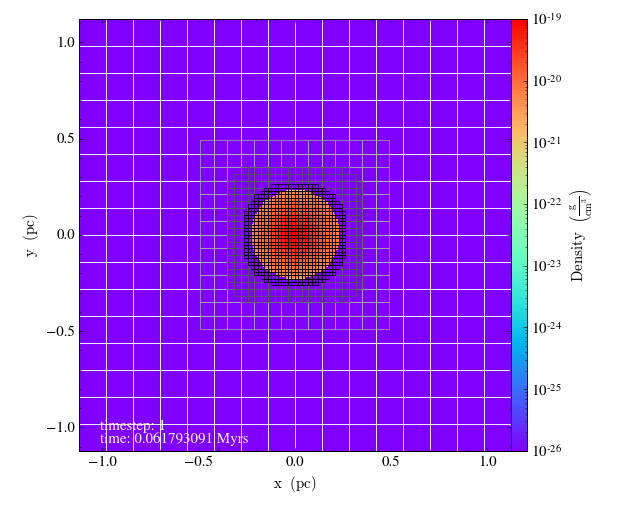

In [30]:
plot_is.plot_time_slice("density",1,grid = True, plot_size=6,zmin=1e-26,zmax=1e-19)

boxlen = 140 so center is at 70 


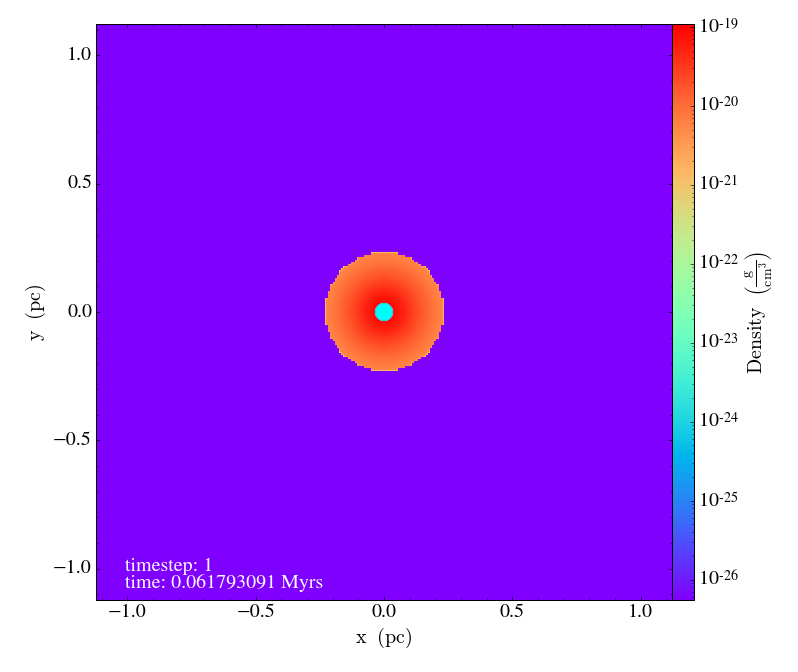

In [61]:
timestep=1
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_axes_unit('pc')
slc.set_cmap(physical_quantity,"rainbow")
slc.set_font_size(20)
slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
# slc.annotate_velocity()
slc.annotate_particles((0.1, 'pc'),p_size=1,col='cyan')
# slc.annotate_grids()
slc.show()


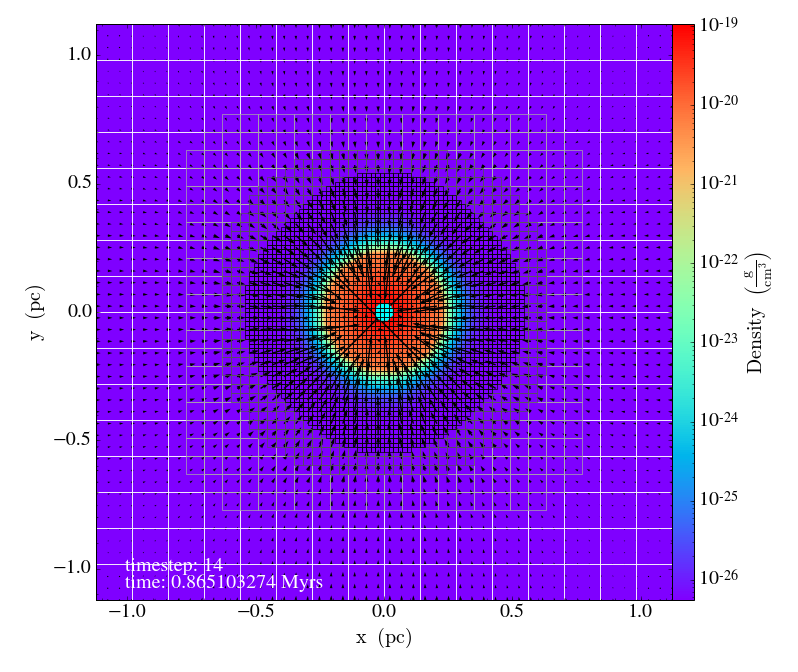

In [64]:
timestep=14
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_axes_unit('pc')
slc.set_cmap(physical_quantity,"rainbow")
slc.set_font_size(20)
slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
slc.annotate_velocity()
slc.annotate_particles((0.1, 'pc'),p_size=1,col='cyan')
slc.annotate_grids()
slc.show()